In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
from Coeffs import *
import itertools
pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

In [2]:
#Discovering the value of g1 and vev from UFO parameters

aEWM1 = 127.9
aEW = 1/aEWM1
ee = 2*np.sqrt(aEW)*np.sqrt(np.pi)
Gf = 0.0000116637
MZ = 91.1876
MW = np.sqrt(MZ**2/2. + np.sqrt(MZ**4/4. - (aEW*np.pi*MZ**2)/(Gf*np.sqrt(2))))
sw2 = 1- MW**2/MZ**2
sw = np.sqrt(sw2)
cw = np.sqrt(1-sw2)
g1 = ee/cw
vev = (2*MW*sw)/ee
print('g1 =', g1)
print('vev =', vev)

g1 = 0.35807170271074895
vev = 246.2205690734859


In [3]:
#Defining essential parameters:

gs = np.sqrt(1.63362817)
g1 = 0.0
yDM = 3.0
lamHs = 1.0
ymt = 172.0 #GeV
vev = 246.2205690734859 #GeV
mPsiT = 100000.#GeV
mSDM = 90000. #GeV



In [4]:
mSDMv = np.linspace(200.,2500.,1000)
mPsiTv = np.linspace(200.,2500.,1000)

# Considering only relevant operators to $p p \to t\bar{t}$ production and taking g1 = 0

## $C_{G}$

In [10]:
pts_G = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_G.append([mmsdm,mmpsit,cG(mmpsit, mmsdm, yDM, gs, g1)])
pts_G = np.array(pts_G)
print(pts_G)

[[ 2.00000000e+02  2.00000000e+02 -1.83644360e-09]
 [ 2.00000000e+02  2.02302302e+02 -1.79488214e-09]
 [ 2.00000000e+02  2.04604605e+02 -1.75471578e-09]
 ...
 [ 2.50000000e+03  2.49539540e+03 -1.17966542e-11]
 [ 2.50000000e+03  2.49769770e+03 -1.17749166e-11]
 [ 2.50000000e+03  2.50000000e+03 -1.17532391e-11]]


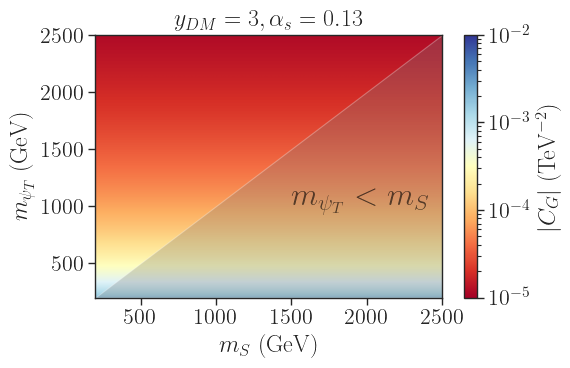

In [11]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (-pts_G[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-5,vmax=1e-2))
plt.colorbar(label=r'$|C_{G}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{Hq}^{(1)}$ with q=t

In [14]:
pts_Hq1 = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_Hq1.append([mmsdm,mmpsit,cHq1(mmpsit, mmsdm, yDM, gs, g1, vev, ymt, t_op = True)])
pts_Hq1 = np.array(pts_Hq1)
print(pts_Hq1)

[[2.00000000e+02 2.00000000e+02 2.89707528e-08]
 [2.00000000e+02 2.02302302e+02 2.87054907e-08]
 [2.00000000e+02 2.04604605e+02 2.84432999e-08]
 ...
 [2.50000000e+03 2.49539540e+03 1.85686271e-10]
 [2.50000000e+03 2.49769770e+03 1.85549481e-10]
 [2.50000000e+03 2.50000000e+03 1.85412818e-10]]


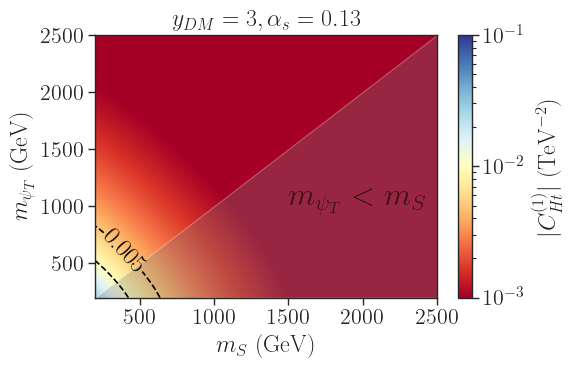

In [16]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (pts_Hq1[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-3,vmax=1e-1))
plt.colorbar(label=r'$|C_{Ht}^{(1)}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{Hq}^{(3)}$ with q=t

In [23]:
pts_Hq3 = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_Hq3.append([mmsdm,mmpsit,cHq3(mmpsit, mmsdm, yDM, gs, g1, vev, ymt, t_op = True)])
pts_Hq3 = np.array(pts_Hq3)
print(pts_Hq3)

[[ 2.00000000e+02  2.00000000e+02 -2.89707528e-08]
 [ 2.00000000e+02  2.02302302e+02 -2.87054907e-08]
 [ 2.00000000e+02  2.04604605e+02 -2.84432999e-08]
 ...
 [ 2.50000000e+03  2.49539540e+03 -1.85686271e-10]
 [ 2.50000000e+03  2.49769770e+03 -1.85549481e-10]
 [ 2.50000000e+03  2.50000000e+03 -1.85412818e-10]]


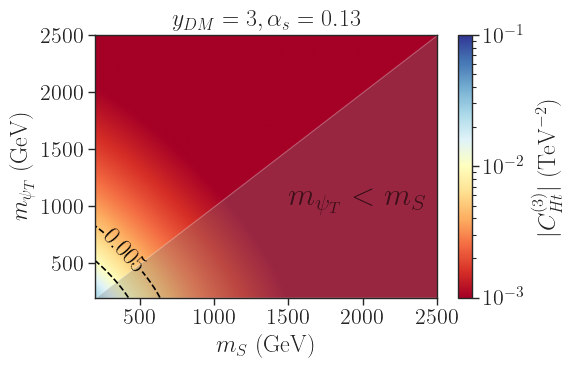

In [28]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (-pts_Hq3[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-3,vmax=1e-1))
plt.colorbar(label=r'$|C_{Ht}^{(3)}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{qd}^{(8)}$

In [29]:
pts_qd8 = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_qd8.append([mmsdm,mmpsit,cqd8(mmpsit, mmsdm, yDM, gs, g1)])
pts_qd8 = np.array(pts_qd8)
print(pts_qd8)

[[2.00000000e+02 2.00000000e+02 5.63333327e-08]
 [2.00000000e+02 2.02302302e+02 5.50584252e-08]
 [2.00000000e+02 2.04604605e+02 5.38263126e-08]
 ...
 [2.50000000e+03 2.49539540e+03 3.61865098e-10]
 [2.50000000e+03 2.49769770e+03 3.61198293e-10]
 [2.50000000e+03 2.50000000e+03 3.60533329e-10]]


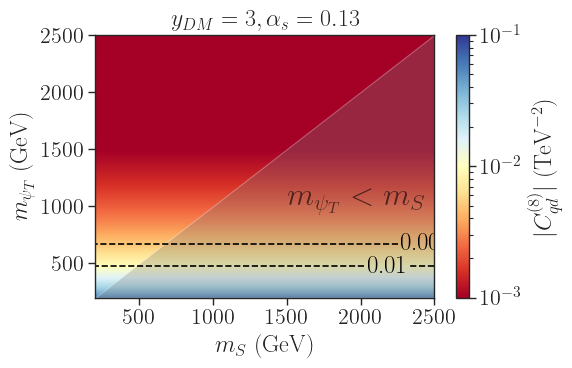

In [30]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (pts_qd8[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-3,vmax=1e-1))
plt.colorbar(label=r'$|C_{qd}^{(8)}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{qq}^{(1)}$

In [31]:
pts_qq1 = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_qq1.append([mmsdm,mmpsit,cqq1(mmpsit, mmsdm, yDM, gs, g1)])
pts_qq1 = np.array(pts_qq1)
print(pts_qq1)

[[ 2.00000000e+02  2.00000000e+02 -2.34722219e-09]
 [ 2.00000000e+02  2.02302302e+02 -2.29410105e-09]
 [ 2.00000000e+02  2.04604605e+02 -2.24276303e-09]
 ...
 [ 2.50000000e+03  2.49539540e+03 -1.50777124e-11]
 [ 2.50000000e+03  2.49769770e+03 -1.50499289e-11]
 [ 2.50000000e+03  2.50000000e+03 -1.50222220e-11]]


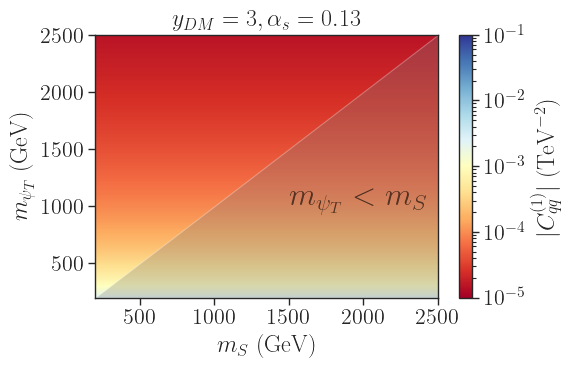

In [32]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (-pts_qq1[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-5,vmax=1e-1))
plt.colorbar(label=r'$|C_{qq}^{(1)}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{qq}^{(3)}$

In [35]:
pts_qq3 = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_qq3.append([mmsdm,mmpsit,cqq3(mmpsit, mmsdm, yDM, gs, g1)])
pts_qq3 = np.array(pts_qq3)
print(pts_qq3)

[[ 2.00000000e+02  2.00000000e+02 -7.04166658e-09]
 [ 2.00000000e+02  2.02302302e+02 -6.88230315e-09]
 [ 2.00000000e+02  2.04604605e+02 -6.72828908e-09]
 ...
 [ 2.50000000e+03  2.49539540e+03 -4.52331372e-11]
 [ 2.50000000e+03  2.49769770e+03 -4.51497866e-11]
 [ 2.50000000e+03  2.50000000e+03 -4.50666661e-11]]


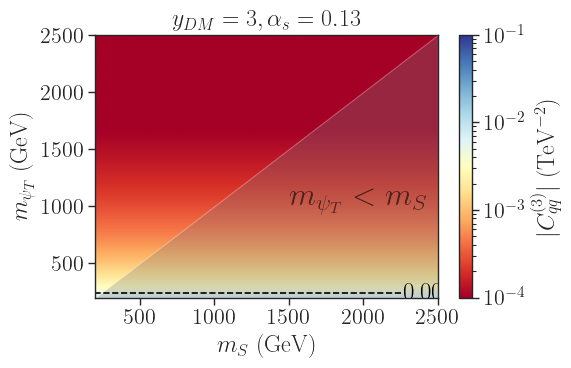

In [36]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (-pts_qq3[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-4,vmax=1e-1))
plt.colorbar(label=r'$|C_{qq}^{(3)}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{qu}^{(8)}$ with u=t

In [39]:
pts_qu8 = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_qu8.append([mmsdm,mmpsit,cqu8(mmpsit, mmsdm, yDM, gs, g1, t_op = True)])
pts_qu8 = np.array(pts_qu8)
print(pts_qu8)

[[2.00000000e+02 2.00000000e+02 2.34621796e-07]
 [2.00000000e+02 2.02302302e+02 2.31045180e-07]
 [2.00000000e+02 2.04604605e+02 2.27547435e-07]
 ...
 [2.50000000e+03 2.49539540e+03 1.50528794e-09]
 [2.50000000e+03 2.49769770e+03 1.50343215e-09]
 [2.50000000e+03 2.50000000e+03 1.50157949e-09]]


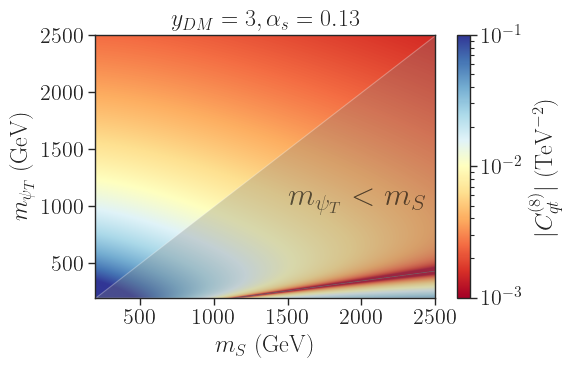

In [40]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
#Positive values 
z_p = (pts_qu8[:,2])*1e6 # Convert to TeV
znewp = np.reshape(z_p,(len(x),len(y)))
plt.imshow(znewp.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-3,vmax=1e-1))
#Negative values
z_m = (-pts_qu8[:,2])*1e6 # Convert to TeV
znewm = np.reshape(z_m,(len(x),len(y)))
plt.imshow(znewm.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-3,vmax=1e-1))
plt.colorbar(label=r'$|C_{qt}^{(8)}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

Interesting observation: The coefficient is postive for the majority of masses, except for $m_S \in [1000,2500]$ and approximately $m_{\Psi_T} \in [200,400]$. However we are not interested in this region because it corresponds to a stable colored vector-like top partner.

## $C_{ud}^{(8)}$ with u=t

In [45]:
pts_ud8 = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_ud8.append([mmsdm,mmpsit,cud8(mmpsit, mmsdm, yDM, gs, g1,t_op=True)])
pts_ud8 = np.array(pts_ud8)
print(pts_ud8)

[[2.00000000e+02 2.00000000e+02 2.34621796e-07]
 [2.00000000e+02 2.02302302e+02 2.31045180e-07]
 [2.00000000e+02 2.04604605e+02 2.27547435e-07]
 ...
 [2.50000000e+03 2.49539540e+03 1.50528794e-09]
 [2.50000000e+03 2.49769770e+03 1.50343215e-09]
 [2.50000000e+03 2.50000000e+03 1.50157949e-09]]


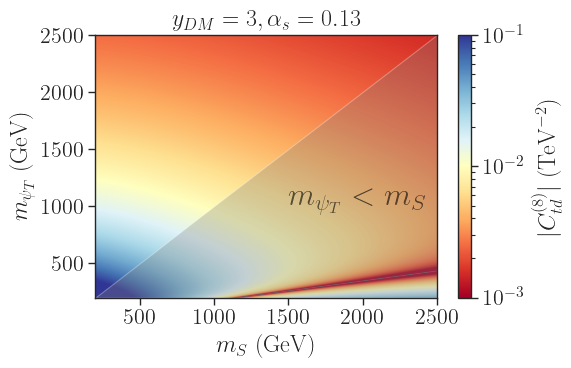

In [46]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
#Positive values 
z_p = (pts_ud8[:,2])*1e6 # Convert to TeV
znewp = np.reshape(z_p,(len(x),len(y)))
plt.imshow(znewp.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-3,vmax=1e-1))
#Negative values
z_m = (-pts_ud8[:,2])*1e6 # Convert to TeV
znewm = np.reshape(z_m,(len(x),len(y)))
plt.imshow(znewm.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-3,vmax=1e-1))
plt.colorbar(label=r'$|C_{td}^{(8)}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{uG}$ with u=t

In [47]:
pts_uG = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_uG.append([mmsdm,mmpsit,cuG(mmpsit, mmsdm, yDM, gs, g1, ymt, vev)])
pts_uG = np.array(pts_uG)
print(pts_uG)

[[2.00000000e+02 2.00000000e+02 3.74815268e-08]
 [2.00000000e+02 2.02302302e+02 3.69687308e-08]
 [2.00000000e+02 2.04604605e+02 3.64658686e-08]
 ...
 [2.50000000e+03 2.49539540e+03 2.40412774e-10]
 [2.50000000e+03 2.49769770e+03 2.40147070e-10]
 [2.50000000e+03 2.50000000e+03 2.39881772e-10]]


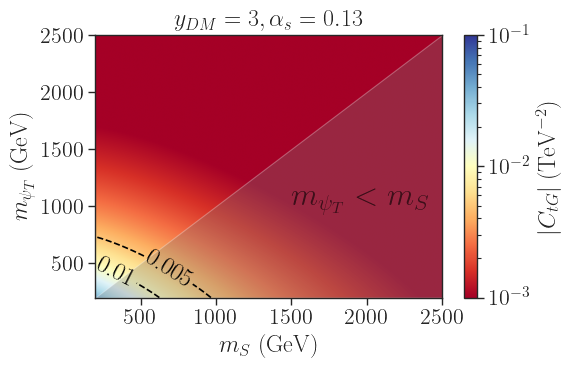

In [48]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
z = (pts_uG[:,2])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-3,vmax=1e-1))
plt.colorbar(label=r'$|C_{tG}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

## $C_{uu}$ with at least one u=t

In [49]:
pts_uu = []
for mmsdm,mmpsit in itertools.product(mSDMv,mPsiTv):
    pts_uu.append([mmsdm,mmpsit,cuu(mmpsit, mmsdm, yDM, gs, g1, ymt, vev, t_op = True)])
pts_uu = np.array(pts_uu)

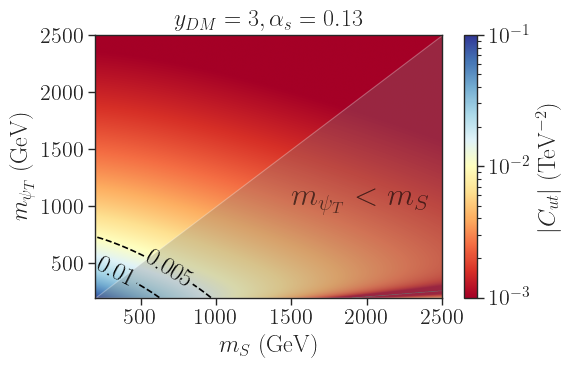

In [50]:
plt.figure(figsize=(6,4))
x = mSDMv
y = mPsiTv
#Positive values 
z_p = (pts_uu[:,2])*1e6 # Convert to TeV
znewp = np.reshape(z_p,(len(x),len(y)))
plt.imshow(znewp.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-3,vmax=1e-1))
#Negative values
z_m = (-pts_uu[:,2])*1e6 # Convert to TeV
znewm = np.reshape(z_m,(len(x),len(y)))
plt.imshow(znewm.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-3,vmax=1e-1))
plt.colorbar(label=r'$|C_{ut}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{S}$ (GeV)')
plt.ylabel(r'$m_{\psi_T}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.min(), facecolor='gray', alpha=0.3)
plt.text(1500.,1000.,r'$m_{\psi_T} < m_{S}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.show()

# Comparing coefficients

In [109]:
mSDMc = [500., 1500., 1500.] #GeV
mPsiTc = [1600., 1600., 2000.] #GeV

In [122]:
coeffs_df = []
coeffs_names = [r'$|C_{G}|$', r'$|C_{Hq}^{(1)}|$', r'$|C_{Hq}^{(3)}|$', r'$|C_{qd}^{(8)}|$',
              r'$|C_{qq}^{(1)}|$', r'$|C_{qq}^{(3)}|$', r'$|C_{qu}^{(8)}|$', r'$|C_{ud}^{(8)}|$',
              r'$|C_{uG}|$', r'$|C_{uu}|$']

for i,mmpsit in enumerate(mPsiTc):
    label = r'$m_{\Psi_T} = %1.2f TeV, m_S = %1.2f TeV$' % (mmpsit/1000,mSDMc[i]/1000) #Write in TeV
    coeffs_df.append([label,r'$|C_{G}|$', cG(mmpsit, mSDMc[i], yDM, gs, g1)])
    coeffs_df.append([label,r'$|C_{Hq}^{(1)}|$',cHq1(mmpsit, mSDMc[i], yDM, gs, g1, vev, ymt, t_op = True)])
    coeffs_df.append([label,r'$|C_{Hq}^{(3)}|$',cHq3(mmpsit, mSDMc[i], yDM, gs, g1, vev, ymt, t_op = True)])
    coeffs_df.append([label, r'$|C_{qd}^{(8)}|$', cqd8(mmpsit, mSDMc[i], yDM, gs, g1)])
    coeffs_df.append([label,r'$|C_{qq}^{(1)}|$', cqq1(mmpsit, mSDMc[i], yDM, gs, g1)])
    coeffs_df.append([label,r'$|C_{qq}^{(3)}|$', cqq3(mmpsit, mSDMc[i], yDM, gs, g1)])
    coeffs_df.append([label,r'$|C_{qu}^{(8)}|$',cqu8(mmpsit, mSDMc[i], yDM, gs, g1, t_op = True)])
    coeffs_df.append([label,r'$|C_{ud}^{(8)}|$',cud8(mmpsit, mSDMc[i], yDM, gs, g1, t_op = True)])
    coeffs_df.append([label,r'$|C_{uG}|$',cuG(mmpsit, mSDMc[i], yDM, gs, g1, ymt, vev)])
    coeffs_df.append([label,r'$|C_{uu}|$',cuu(mmpsit, mSDMc[i], yDM, gs, g1, ymt, vev, t_op = True)])
    

#If we are interested in the absolute value of the coefficient
for c in coeffs_df:
    c[2] = abs(c[2])*1e6 #Convert to TeV
    
df = pd.DataFrame(coeffs_df, columns=['group', 'column', 'val'])


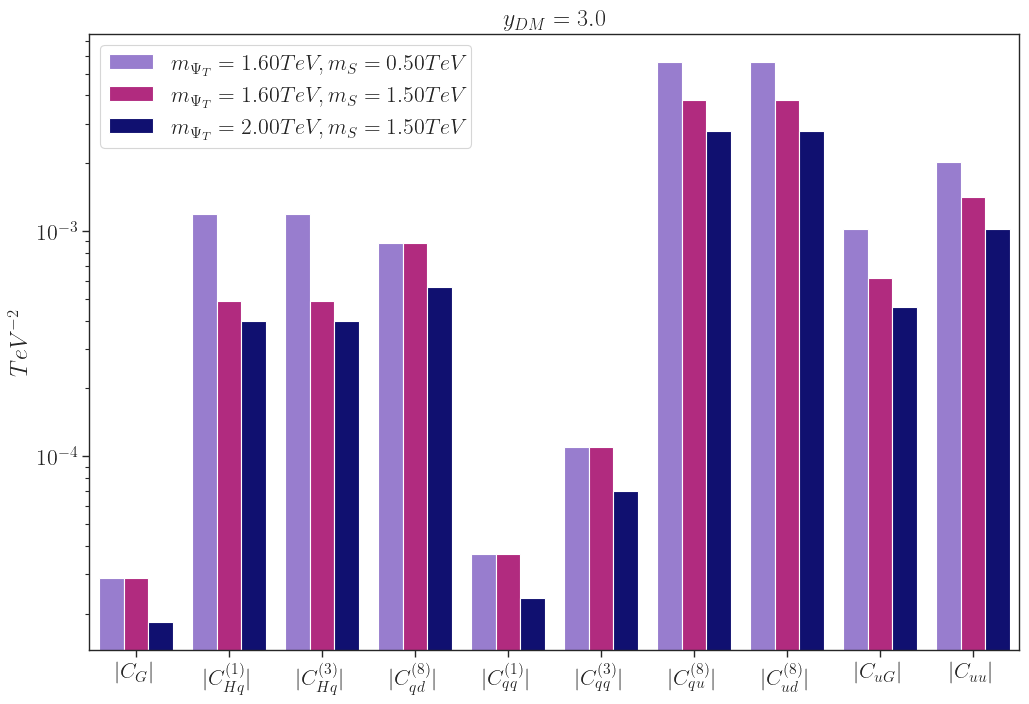

In [136]:
plt.figure(figsize=(12,8))

#Generate the color dictionary
colors = {}
c = ['mediumpurple', 'mediumvioletred', 'navy']
for i,mmpsit in enumerate(mPsiTc):
    label = r'$m_{\Psi_T} = %1.2f TeV, m_S = %1.2f TeV$' % (mmpsit/1000,mSDMc[i]/1000) 
    colors[label] = c[i]
    
ax = sns.barplot(data=df, x='column', y='val', hue='group', palette = colors)
ax.set_yscale('log')
ax.set_ylabel(r'$TeV^{-2}$')
ax.set_xlabel('')
ax.legend()
ax.set_title(r'$y_{DM} = %1.1f$' %(yDM))


plt.show()